In [1]:
import pandas as pd
import numpy as np

In [2]:

# Load the dataset
df = pd.read_excel(r"D:\My folder\My_own_project_power_BI\HRMS_EMP.xlsx")

# Quick overview
df.head(2)

,EMP_ID,EMP_NAME,ADDRESS_PERMANENT,ORG_LOC,LAST_EDU_TITLE,JOINING_DATE,ASSGNMNT_END_DATE,BLOOD_GROUP,GROSS,DEPARTMENT_TITLE,...,GENDER,MARITAL_STS,NATIONALITY,RELIGION,EMP_CAT_TITLE,ORG_LOC_TITLE,ORG_LOC_ADDRESS,WHICH_PRODUCTS_UNDER,SCORE,AWARD
0,4324,Sabbir Hossain,Gossai Jowair,Headquarters,"SSC(Board),",2010-03-28,NaT,B+,21300.0,Electrical & Renewable Energy,...,Male,Married,Bangladeshi,Islam,Permanent,Chandra,NaN,Refrigerator,90.0,NaN
1,8429,Abdur Rahman,Rogunathpur,Headquarters,"Class-Vlll,",2011-06-21,NaT,A+,19800.0,Research & Innovation (R&I),...,Male,Married,Bangladeshi,Islam,Permanent,Chandra,NaN,Refrigerator,84.0,NaN


In [3]:
df.shape

(60104, 24)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60104 entries, 0 to 60103
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   EMP_ID                60104 non-null  object        
 1   EMP_NAME              60104 non-null  object        
 2   ADDRESS_PERMANENT     60074 non-null  object        
 3   ORG_LOC               60104 non-null  object        
 4   LAST_EDU_TITLE        60104 non-null  object        
 5   JOINING_DATE          60104 non-null  datetime64[ns]
 6   ASSGNMNT_END_DATE     16778 non-null  datetime64[ns]
 7   BLOOD_GROUP           53979 non-null  object        
 8   GROSS                 60079 non-null  float64       
 9   DEPARTMENT_TITLE      60104 non-null  object        
 10  DESIGNATION           60104 non-null  object        
 11  DESIGNATION_ORDER     60104 non-null  int64         
 12  DOB                   60104 non-null  object        
 13  EMP_STS         

In [5]:
df.isnull().sum()

EMP_ID                      0
EMP_NAME                    0
ADDRESS_PERMANENT          30
ORG_LOC                     0
LAST_EDU_TITLE              0
JOINING_DATE                0
ASSGNMNT_END_DATE       43326
BLOOD_GROUP              6125
GROSS                      25
DEPARTMENT_TITLE            0
DESIGNATION                 0
DESIGNATION_ORDER           0
DOB                         0
EMP_STS                     0
GENDER                      0
MARITAL_STS               933
NATIONALITY               143
RELIGION                    0
EMP_CAT_TITLE               0
ORG_LOC_TITLE           56424
ORG_LOC_ADDRESS         60104
WHICH_PRODUCTS_UNDER        0
SCORE                   35690
AWARD                   58252
dtype: int64

In [6]:
# Standardize column names
df.columns = df.columns.str.strip().str.upper()

In [7]:
# Convert date columns
df['JOINING_DATE'] = pd.to_datetime(df['JOINING_DATE'], errors='coerce')
df['ASSGNMNT_END_DATE'] = pd.to_datetime(df['ASSGNMNT_END_DATE'], errors='coerce')


In [8]:
# Define Active / Attrited employees
df['STATUS'] = df['ASSGNMNT_END_DATE'].apply(lambda x: 'Active' if pd.isna(x) else 'Attrited')


In [9]:
# Tenure (in years)
import datetime
today = pd.Timestamp(datetime.date.today())
df['END_DATE'] = df['ASSGNMNT_END_DATE'].fillna(today)
df['TENURE_YEARS'] = (df['END_DATE'] - df['JOINING_DATE']).dt.days / 365

## Overall Attrition Rate
- % of employees who left


In [10]:
(df['STATUS'].value_counts(normalize=True) * 100).round(1)

STATUS
Active      72.1
Attrited    27.9
Name: proportion, dtype: float64

## Attrition by Department
- Which departments have the highest attrition

In [11]:
(pd.crosstab(df['DEPARTMENT_TITLE'], df['STATUS'], normalize='index') * 100).round(1)

STATUS,Active,Attrited
DEPARTMENT_TITLE,,
Administration,59.3,40.7
Automobile & Machine Management,75.8,24.2
Bill Verification,87.3,12.7
Board of Directors,81.8,18.2
Business Planning & Development,71.0,29.0
CEO's Office,0.0,100.0
Construction Engineering,76.5,23.5
Corporate Affairs,75.0,25.0
Credit Recovery,71.4,28.6


## Attrition by Salary Slab
- Check if lower-paid employees leave more

In [12]:
# Define bins (salary ranges) and labels
bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, float('inf')]
labels = [
    'Up to 20K',
    '21K–40K',
    '41K–60K',
    '61K–80K',
    '81K–100K',
    '101K–150K',
    '151K–200K',
    '200K+'
]

# Apply to your dataset
df['SALARY_SLAB'] = pd.cut(df['GROSS'], bins=bins, labels=labels, include_lowest=True)

# Preview
df[['GROSS', 'SALARY_SLAB']].head(10)


,GROSS,SALARY_SLAB
0,21300.0,21K–40K
1,19800.0,Up to 20K
2,400.0,Up to 20K
3,20900.0,21K–40K
4,22900.0,21K–40K
5,15600.0,Up to 20K
6,21100.0,21K–40K
7,19600.0,Up to 20K
8,20700.0,21K–40K
9,124800.0,101K–150K


In [13]:
# Group and count
attrition_by_slab = pd.crosstab(df['SALARY_SLAB'], df['STATUS'], normalize='index') * 100

# Round and rename columns
attrition_by_slab = attrition_by_slab.round(2).reset_index()
attrition_by_slab.rename(columns={'Attrited':'Attrition Rate (%)', 'Active':'Active Rate (%)'}, inplace=True)

# Display
attrition_by_slab


STATUS,SALARY_SLAB,Active Rate (%),Attrition Rate (%)
0,Up to 20K,70.48,29.52
1,21K–40K,83.42,16.58
2,41K–60K,76.54,23.46
3,61K–80K,79.70,20.30
4,81K–100K,75.09,24.91
5,101K–150K,73.17,26.83
6,151K–200K,84.03,15.97
7,200K+,60.00,40.00


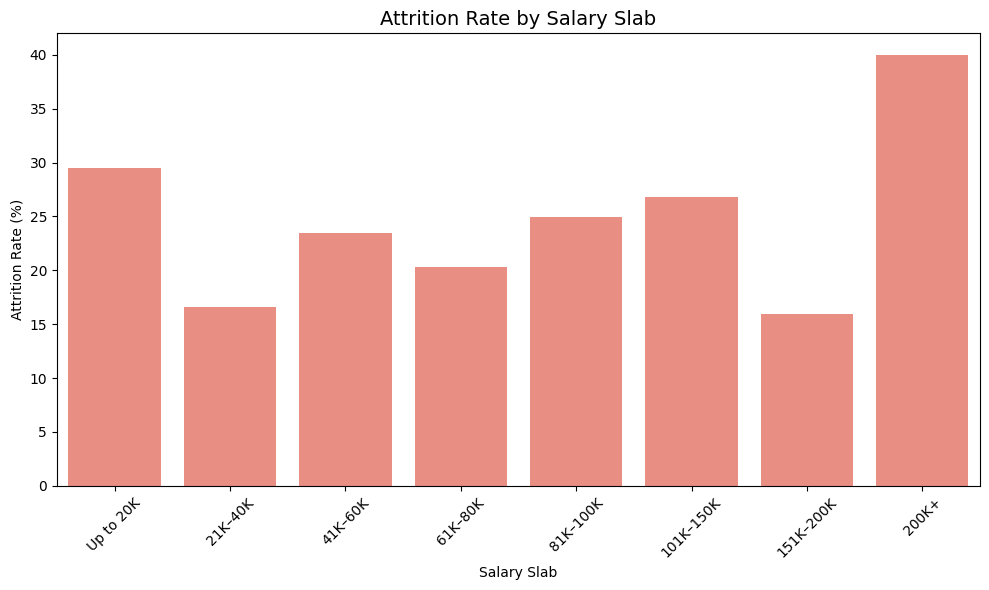

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='SALARY_SLAB', y='Attrition Rate (%)', data=attrition_by_slab, color='salmon')
plt.title("Attrition Rate by Salary Slab", fontsize=14)
plt.xlabel("Salary Slab")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Attrition by Tenure
- When employees are most likely to leave

In [15]:
# Round tenure to nearest year for grouping
df['TENURE_YEAR_ROUND'] = df['TENURE_YEARS'].round()
df_filtered = df[df['TENURE_YEAR_ROUND'] <= 25]
# Calculate attrition rate per year
attrition_trend = (
    df_filtered.groupby('TENURE_YEAR_ROUND')['STATUS']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).reset_index()

# Keep only Attrited percentage
attrition_trend = attrition_trend[['TENURE_YEAR_ROUND', 'Attrited']]
attrition_trend.rename(columns={'Attrited': 'Attrition Rate (%)'}, inplace=True)

attrition_trend.head()



STATUS,TENURE_YEAR_ROUND,Attrition Rate (%)
0,0.0,80.155474
1,1.0,35.534591
2,2.0,22.335245
3,3.0,27.895770
4,4.0,11.981509


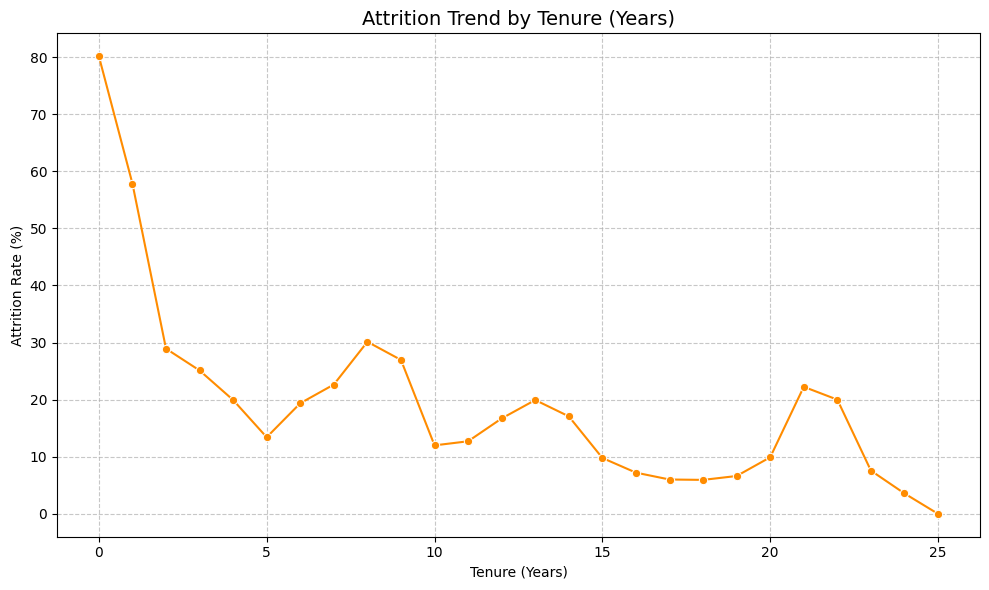

In [16]:
attrition_trend['Smoothed Rate'] = attrition_trend['Attrition Rate (%)'].rolling(window=2, min_periods=1).mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=attrition_trend, x='TENURE_YEAR_ROUND', y='Smoothed Rate', marker='o', color='darkorange')
plt.title('Attrition Trend by Tenure (Years)', fontsize=14)
plt.xlabel('Tenure (Years)')
plt.ylabel('Attrition Rate (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Monthly Attrition Trend 

In [17]:
# Extract attrition dates
df_attr = df[df['STATUS'] == 'Attrited'].copy()
df_attr['EXIT_MONTH'] = df_attr['ASSGNMNT_END_DATE'].dt.to_period('M')

# Monthly attrition trend
monthly_attr = df_attr.groupby('EXIT_MONTH').size().reset_index(name='ATTR_COUNT')
monthly_attr['EXIT_MONTH'] = monthly_attr['EXIT_MONTH'].dt.to_timestamp()


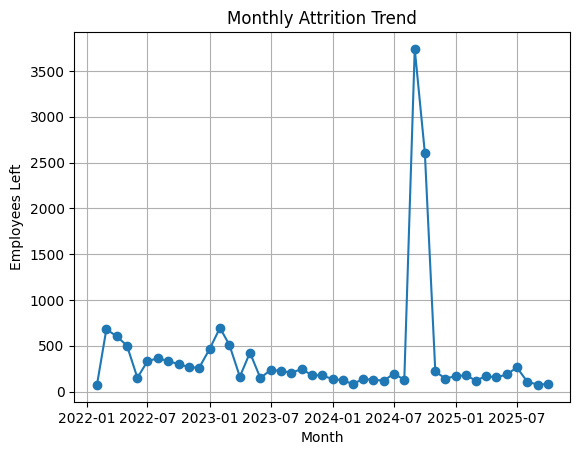

In [18]:
import matplotlib.pyplot as plt
plt.plot(monthly_attr['EXIT_MONTH'], monthly_attr['ATTR_COUNT'], marker='o')
plt.title("Monthly Attrition Trend")
plt.xlabel("Month")
plt.ylabel("Employees Left")
plt.grid(True)
plt.show()


Forecast Attrition (Next 12 Months)

11:50:11 - cmdstanpy - INFO - Chain [1] start processing
11:50:11 - cmdstanpy - INFO - Chain [1] done processing


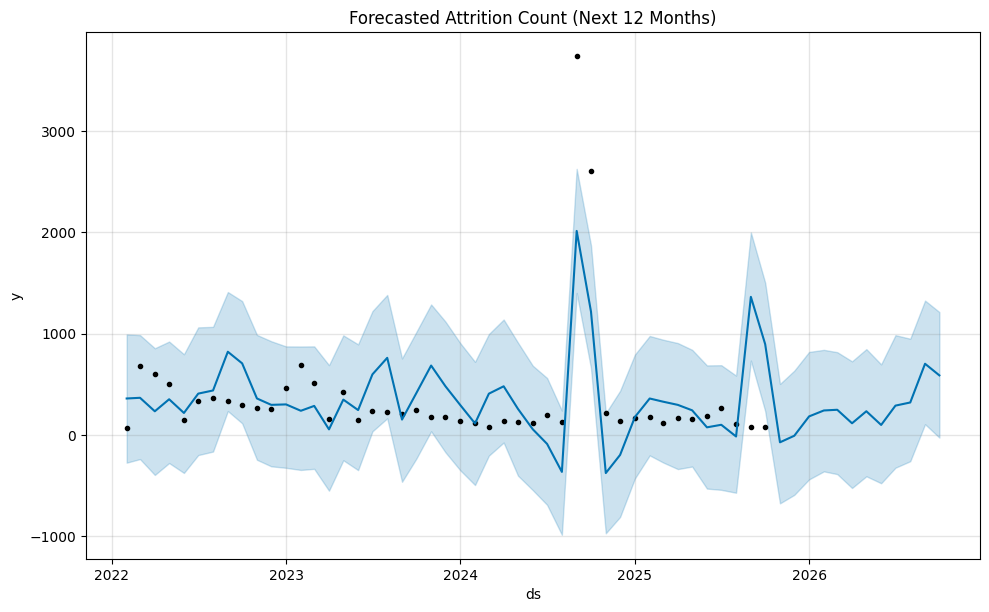

In [21]:
from prophet import Prophet

ts = monthly_attr.rename(columns={'EXIT_MONTH':'ds','ATTR_COUNT':'y'})

m = Prophet(yearly_seasonality=True)
m.fit(ts)

future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

m.plot(forecast)
plt.title("Forecasted Attrition Count (Next 12 Months)")
plt.show()


In [31]:
from datetime import datetime
# Create month columns for join and exit
df = df[df['JOINING_DATE'] >= '2022-01-01']
df['STATUS'] = df['ASSGNMNT_END_DATE'].apply(lambda x: 'Active' if pd.isna(x) else 'Attrited')

df['JOIN_MONTH'] = df['JOINING_DATE'].dt.to_period('M').dt.to_timestamp()
df['EXIT_MONTH'] = df['ASSGNMNT_END_DATE'].dt.to_period('M').dt.to_timestamp()

# Monthly headcount (employees who joined before and still active or not yet exited)
all_months = pd.date_range(df['JOINING_DATE'].min(), datetime.today(), freq='MS')
headcount = []
for m in all_months:
    count = ((df['JOINING_DATE'] <= m) & ((df['ASSGNMNT_END_DATE'].isna()) | (df['ASSGNMNT_END_DATE'] >= m))).sum()
    headcount.append({'Month': m, 'Headcount': count})
headcount_df = pd.DataFrame(headcount)

# Monthly attrition count
attritions = (
    df[df['STATUS'] == 'Attrited']
    .groupby('EXIT_MONTH')
    .size()
    .reset_index(name='Attritions')
    .rename(columns={'EXIT_MONTH':'Month'})
)

# Merge to get attrition rate
monthly = pd.merge(headcount_df, attritions, on='Month', how='left').fillna(0)
monthly['Attrition_Rate'] = (monthly['Attritions'] / monthly['Headcount']) * 100
monthly = monthly[monthly['Headcount'] > 0]
monthly

,Month,Headcount,Attritions,Attrition_Rate
0,2022-01-01,73,0.0,0.000000
1,2022-02-01,597,5.0,0.837521
2,2022-03-01,1945,17.0,0.874036
3,2022-04-01,3695,23.0,0.622463
4,2022-05-01,6037,91.0,1.507371
5,2022-06-01,7898,46.0,0.582426
6,2022-07-01,7988,147.0,1.840260
7,2022-08-01,7991,151.0,1.889626
8,2022-09-01,8003,100.0,1.249531
9,2022-10-01,8011,78.0,0.973661


In [32]:


# Prepare data
df_prophet = monthly.rename(columns={'Month': 'ds', 'Attrition_Rate': 'y'})

# Build and fit model
model = Prophet(interval_width=0.9, yearly_seasonality=True)
model.fit(df_prophet)

# Forecast next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


11:59:28 - cmdstanpy - INFO - Chain [1] start processing
11:59:28 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\43667\AppData\Local\Temp\ipykernel_22216\4176833268.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\43667\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


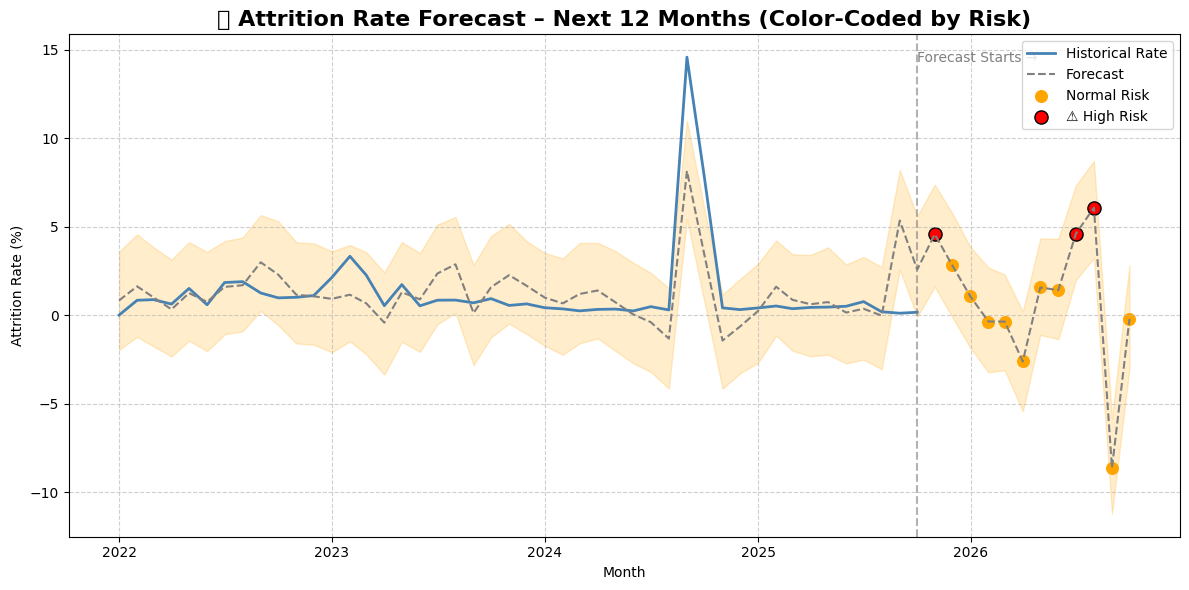

In [33]:
import matplotlib.pyplot as plt

# Define high-risk threshold (e.g., top 90th percentile)
threshold = forecast['yhat'].quantile(0.9)
forecast['Risk_Level'] = forecast['yhat'].apply(lambda x: 'High' if x >= threshold else 'Normal')

# Split forecast parts
forecast_next_12 = forecast.tail(12)
historical = df_prophet

# Create plot
plt.figure(figsize=(12,6))

# Historical attrition rate
plt.plot(historical['ds'], historical['y'], label='Historical Rate', color='steelblue', linewidth=2)

# Forecast line
plt.plot(forecast['ds'], forecast['yhat'], color='gray', linestyle='--', linewidth=1.5, label='Forecast')

# Confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

# Scatter points for risk levels
normal_risk = forecast_next_12[forecast_next_12['Risk_Level'] == 'Normal']
high_risk = forecast_next_12[forecast_next_12['Risk_Level'] == 'High']

plt.scatter(normal_risk['ds'], normal_risk['yhat'], color='orange', label='Normal Risk', s=70)
plt.scatter(high_risk['ds'], high_risk['yhat'], color='red', label='⚠️ High Risk', s=90, edgecolor='black')

# Mark forecast start
plt.axvline(x=historical['ds'].max(), color='gray', linestyle='--', alpha=0.6)
plt.text(historical['ds'].max(), plt.ylim()[1]*0.9, 'Forecast Starts →', color='gray')

# Titles and styling
plt.title('📈 Attrition Rate Forecast – Next 12 Months (Color-Coded by Risk)', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Attrition Rate (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['GROSS','TENURE_YEARS','DESIGNATION_ORDER']]  # + others
y = df['STATUS'].map({'Active':0, 'Attrited':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8738
           1       0.92      0.85      0.89      3283

    accuracy                           0.94     12021
   macro avg       0.94      0.91      0.92     12021
weighted avg       0.94      0.94      0.94     12021

